In [71]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scipy.constants as spc
import matplotlib
import copy

In [3]:
# matplotlib.pyplot config:
matplotlib.rcParams.update({'font.size': 15})

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]


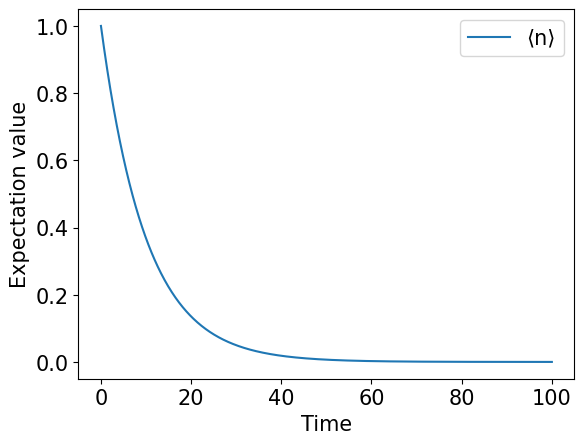

In [4]:
dims = 10

h_bar = 1.05e-34
omega = 1.0
a = qt.destroy(dims)
h_c = h_bar * omega * a * a.dag()

alpha = 1 + 0j
d = qt.displace(dims,alpha)

initial_state = qt.basis(dims, 0)  # Ground state

print(initial_state)

displaced_state = d * initial_state

print(displaced_state)

tlist = np.linspace(0, 100, 1000)  # Time evolution

# If there is dissipation, define collapse operators

kappa = 0.1  # Dissipation rate
c_ops = [np.sqrt(kappa) * a]  # Collapse operator list

# Without dissipation, c_ops would be an empty list:
# c_ops = []

# Using the master equation solver
result = qt.mesolve(h_c, displaced_state, tlist, c_ops, [a.dag() * a])

# Extract the expectation values (probabilities) for each Fock state
probabilities = result.expect[0]

# Plot the probabilities
plt.figure()
plt.plot(tlist, probabilities, label="⟨n⟩")
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.legend()
plt.show()

In [5]:
dims = 10

h_bar = 1.05e-34
omega = 1.0
a = qt.destroy(dims)
h_c = h_bar * omega * a * a.dag()

initial_state = qt.basis(dims, 0)

sweep_start = -2
sweep_end = 2
num_tests = 101

test_pts = np.linspace(sweep_start, sweep_end, num_tests)

# print(test_pts)

displacement_results = np.empty((num_tests, dims))

for i in range(num_tests):
    # print(abs((qt.displace(dim, test_pts[i] + 0j) * initial_state).full()[:,0]))
    displacement_results[i] = abs((qt.displace(dims, test_pts[i] + 0j) * initial_state).full()[:,0])

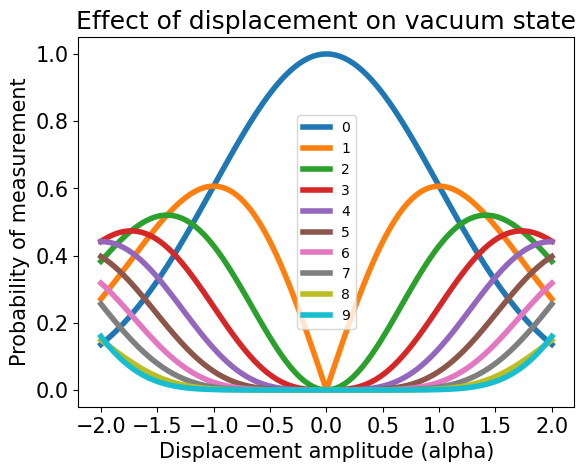

In [6]:
matplotlib.rcParams.update({'font.size': 15})
for i in range(dims):
    plt.plot(test_pts, displacement_results[:,i], label=str(i), linewidth=4)
    
plt.title("Effect of displacement on vacuum state")
plt.xlabel("Displacement amplitude (alpha)")
plt.ylabel("Probability of measurement")
matplotlib.rcParams.update({'font.size': 10})
plt.legend()
plt.show()

In [7]:
# eo_arr_base = [1, 0]

# even_odd_arr = []
# 
# if dims % 2 == 0:
#     for i in range(int(dims / 2)):
#         even_odd_arr = even_odd_arr + eo_arr_base
# else:
#     for i in range(int((dims - 1) / 2)):
#         even_odd_arr = even_odd_arr + eo_arr_base
#     even_odd_arr.append([1])
#     
# even_odd_arr = np.array(even_odd_arr)

In [9]:
initial_state = (qt.basis(dims, 0) + (1j*qt.basis(dims, 2))).unit()

sweep_start = -4
sweep_end = 4
num_tests = 101

test_pts = np.linspace(sweep_start, sweep_end, num_tests)

wigner_elems = np.empty((num_tests, num_tests))

# np.vectorize(qt.displace)(dims, test_pts + (1j * test_pts))

for i, testx in enumerate(test_pts):
    for j, testy in enumerate(test_pts):
        wigner_elems[i, j] = np.sum(abs((qt.displace(dims, testx + (1j*testy)) * initial_state).full()[:,0])[::2] / (dims / 2))

In [10]:
print(test_pts)

[-4.   -3.92 -3.84 -3.76 -3.68 -3.6  -3.52 -3.44 -3.36 -3.28 -3.2  -3.12
 -3.04 -2.96 -2.88 -2.8  -2.72 -2.64 -2.56 -2.48 -2.4  -2.32 -2.24 -2.16
 -2.08 -2.   -1.92 -1.84 -1.76 -1.68 -1.6  -1.52 -1.44 -1.36 -1.28 -1.2
 -1.12 -1.04 -0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24
 -0.16 -0.08  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72
  0.8   0.88  0.96  1.04  1.12  1.2   1.28  1.36  1.44  1.52  1.6   1.68
  1.76  1.84  1.92  2.    2.08  2.16  2.24  2.32  2.4   2.48  2.56  2.64
  2.72  2.8   2.88  2.96  3.04  3.12  3.2   3.28  3.36  3.44  3.52  3.6
  3.68  3.76  3.84  3.92  4.  ]


In [11]:
test_grids = np.meshgrid(test_pts, test_pts)
amp_grid = test_grids[0] + (1j * test_grids[1])

In [13]:
print(test_grids[0] + (1j * test_grids[1]))

[[-4.  -4.j   -3.92-4.j   -3.84-4.j   ...  3.84-4.j    3.92-4.j
   4.  -4.j  ]
 [-4.  -3.92j -3.92-3.92j -3.84-3.92j ...  3.84-3.92j  3.92-3.92j
   4.  -3.92j]
 [-4.  -3.84j -3.92-3.84j -3.84-3.84j ...  3.84-3.84j  3.92-3.84j
   4.  -3.84j]
 ...
 [-4.  +3.84j -3.92+3.84j -3.84+3.84j ...  3.84+3.84j  3.92+3.84j
   4.  +3.84j]
 [-4.  +3.92j -3.92+3.92j -3.84+3.92j ...  3.84+3.92j  3.92+3.92j
   4.  +3.92j]
 [-4.  +4.j   -3.92+4.j   -3.84+4.j   ...  3.84+4.j    3.92+4.j
   4.  +4.j  ]]


In [14]:
op_mat = np.vectorize(qt.displace)(dims, amp_grid) * initial_state

TypeError: must be real number, not Qobj

In [15]:
print(len(op_mat))

NameError: name 'op_mat' is not defined

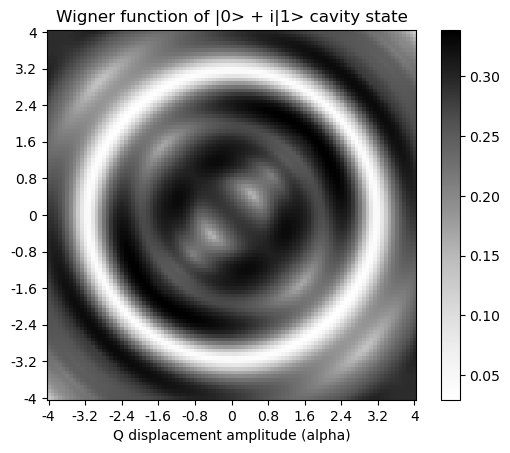

In [16]:
plt.imshow(wigner_elems, cmap="Greys")
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [-4, -3.2, -2.4, -1.6, -0.8, 0, 0.8, 1.6, 2.4, 3.2, 4])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [-4, -3.2, -2.4, -1.6, -0.8, 0, 0.8, 1.6, 2.4, 3.2, 4][::-1])
plt.title("Wigner function of |0> + i|1> cavity state")
plt.xlabel("I displacement amplitude (alpha)")
plt.xlabel("Q displacement amplitude (alpha)")
plt.colorbar()
plt.show()

In [17]:
initial_state = (qt.basis(dims, 0) + qt.basis(dims, 2)).unit()

phase_start = 0
phase_end = 2 * spc.pi
num_tests = 101

test_phases = np.linspace(phase_start, phase_end, num_tests)

test_is = np.cos(test_phases)
test_qs = np.sin(test_phases)

displacement_amp = 1

mid_pk_amp_arr = np.empty(num_tests)

for i in range(num_tests):
    mid_pk_amp_arr[i] = abs((qt.displace(dims, displacement_amp * (test_is[i] + (1j*test_qs[i]))) * initial_state).full()[:,0])[1]

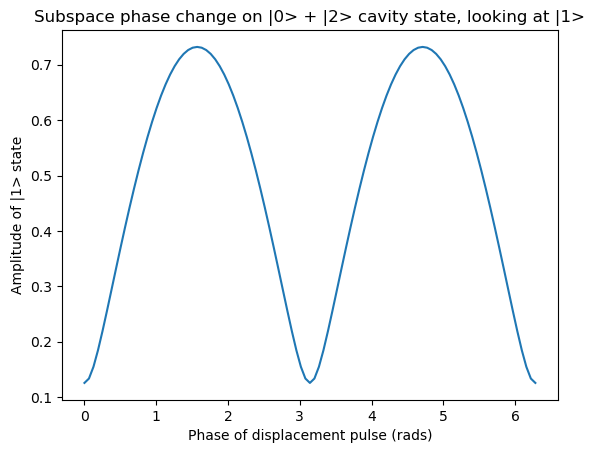

In [18]:
plt.plot(test_phases, mid_pk_amp_arr)
plt.title("Subspace phase change on |0> + |2> cavity state, looking at |1>")
plt.xlabel("Phase of displacement pulse (rads)")
plt.ylabel("Amplitude of |1> state")
plt.show()

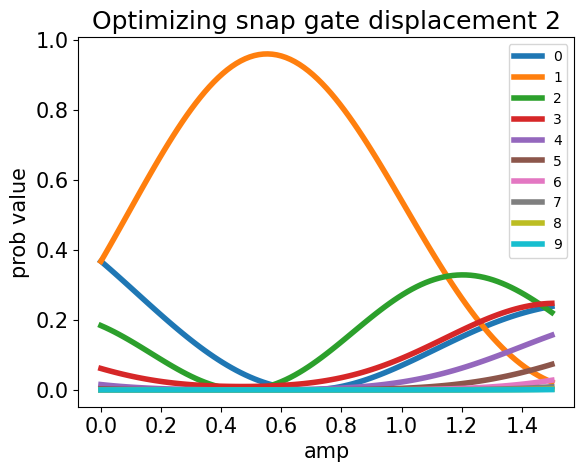

In [19]:
dim = 10
num_iters = 101
mod_fock = 0
cavity = qt.basis(dim, 0)
proj_state = qt.basis(dim, mod_fock)
qubit = qt.basis(2, 0)
state = qt.tensor(qubit, cavity)

#displacement 
alpha1 = 1 +0j
displaced1 = qt.tensor(qt.qeye(2), qt.displace(dim,alpha1))

state = displaced1 * state

#rotate
rotated = qt.tensor( 1j * qt.sigmax(), proj_state.proj())
rotated = rotated * rotated

for i in range(dim):
    if i != mod_fock:
        rotated = rotated + qt.tensor(qt.qeye(2), qt.basis(dim, i).proj())

# state = rotated * state
state = rotated * state
# print(state)

#displace
displace_amps = np.linspace(0, 1.5, num_iters)

state_arr = np.empty((num_iters, dim))

for i, amp in enumerate(displace_amps):
    # np.array(abs((qt.tensor(qt.qeye(2), qt.displace(dim, -amp+0j)) * state).full()))[:10]+np.array(abs((qt.tensor(qt.qeye(2), qt.displace(dim, -amp+0j)) * state).full()))[10:]
    # print(np.array(abs((qt.tensor(qt.qeye(2), qt.displace(dim, -amp+0j)) * state).full())))
    state_arr[i, :] = (np.array(abs((qt.tensor(qt.qeye(2), qt.displace(dim, -amp+0j)) * state).full()))**2)[:10][:,0]

# displaced2 = np.array(displaced2)

matplotlib.rcParams.update({'font.size': 15})
for i in range(dim):
    plt.plot(displace_amps, state_arr[:,i], label=i, linewidth=4) #prints it in the states 

plt.xlabel("amp")
plt.ylabel("prob value")
plt.title("Optimizing snap gate displacement 2")
matplotlib.rcParams.update({'font.size': 10})
plt.legend()
plt.show()

In [62]:
dims = 10
num_iters = 101
mod_fock = [0]
cavity = qt.basis(dims, 0)
proj_states = []
qubit = qt.basis(2, 0)
state = qt.tensor(qubit, cavity)

state_arr = np.empty((num_iters, num_iters, dims))

# Alpha values to loop over
displace_amps = np.linspace(0, 3, num_iters)


# Prepare rotation matrix
phase_flip_mat = qt.tensor( 1j * qt.sigmax(), qt.basis(dims, mod_fock[0]).proj())
for fock in mod_fock:
    if fock is not mod_fock[0]:
        phase_flip_mat = phase_flip_mat + qt.tensor(1j * qt.sigmax(), qt.basis(dims, fock).proj())

phase_flip_mat = phase_flip_mat * phase_flip_mat

for i in range(dims):
    if i not in mod_fock:
        phase_flip_mat = phase_flip_mat + qt.tensor(qt.qeye(2), qt.basis(dims, i).proj())


op_params = np.zeros((dims, 2))
max_probs = np.zeros(dims)

for i, disp_ampi_0 in enumerate(displace_amps): 
    # 1st displacement 
    displacement_mat_0 = qt.tensor(qt.qeye(2), qt.displace(dims, disp_ampi_0 + 0j))
    
    loop_state_0 = phase_flip_mat * displacement_mat_0 * state
    
    for j, disp_ampi_1 in enumerate(displace_amps):
       
        loop_state_1 = qt.tensor(qt.qeye(2), qt.displace(dims, -disp_ampi_1 + 0j)) * loop_state_0
        
        prob_vals = abs(loop_state_1.full()[:, 0])**2
        
        state_arr[i, num_iters - j - 1] = prob_vals[:dims]
        
        for k in range(dims):
            if prob_vals[k] > max_probs[k]:
                max_probs[k] = prob_vals[k]
                op_params[k] = [disp_ampi_0, disp_ampi_1]

Maximum probability for |0> state: 1.0
Optimal parameters: 
 Displacement 1: 0.0 
 Displacement 2: 0.0


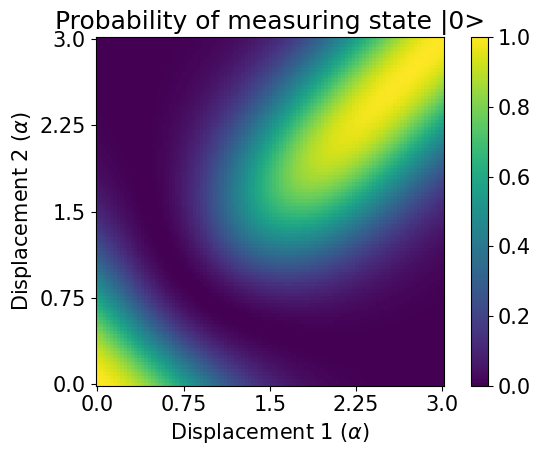

Maximum probability for |1> state: 0.9812
Optimal parameters: 
 Displacement 1: 1.14 
 Displacement 2: 0.57


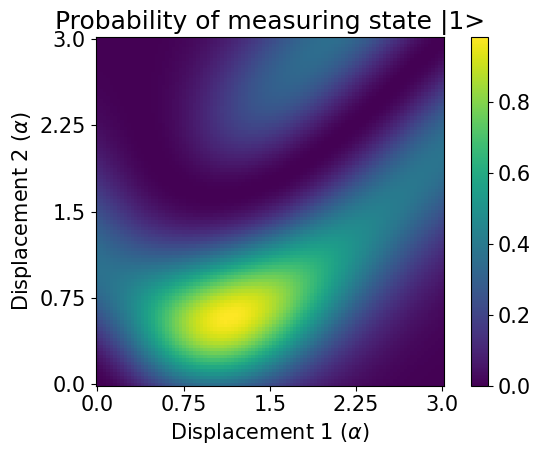

Maximum probability for |2> state: 0.3938
Optimal parameters: 
 Displacement 1: 0.69 
 Displacement 2: 1.1099999999999999


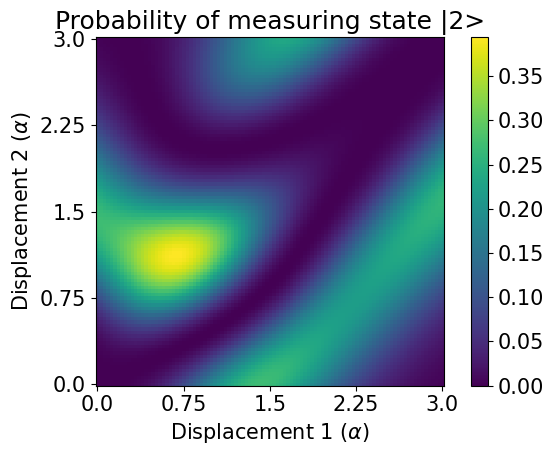

Maximum probability for |3> state: 0.3054
Optimal parameters: 
 Displacement 1: 0.63 
 Displacement 2: 1.44


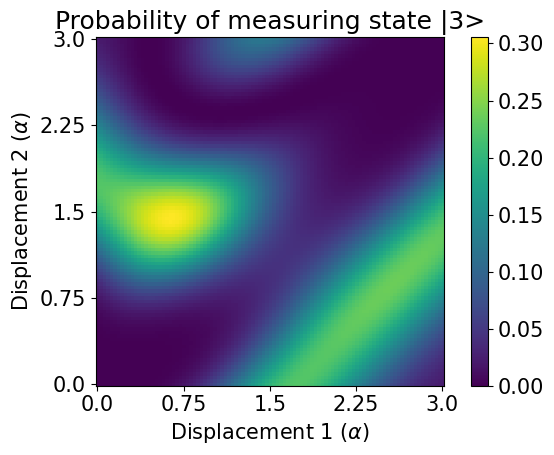

Maximum probability for |4> state: 0.2583
Optimal parameters: 
 Displacement 1: 0.63 
 Displacement 2: 1.71


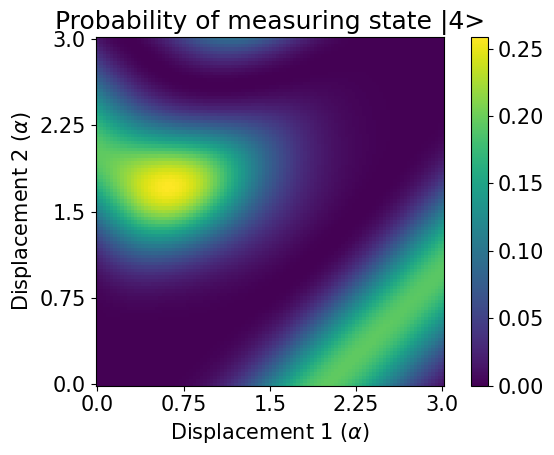

Maximum probability for |5> state: 0.2304
Optimal parameters: 
 Displacement 1: 0.6 
 Displacement 2: 1.95


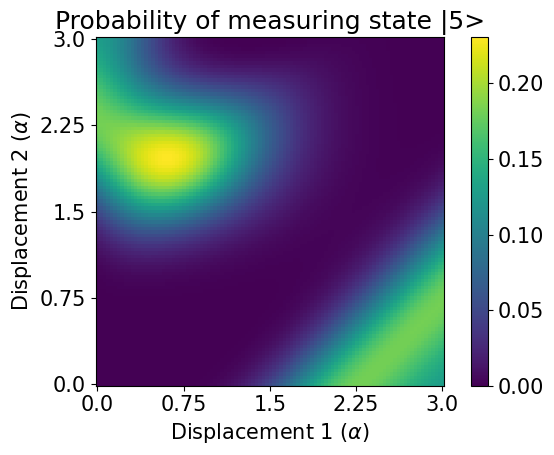

Maximum probability for |6> state: 0.1914
Optimal parameters: 
 Displacement 1: 0.6 
 Displacement 2: 2.13


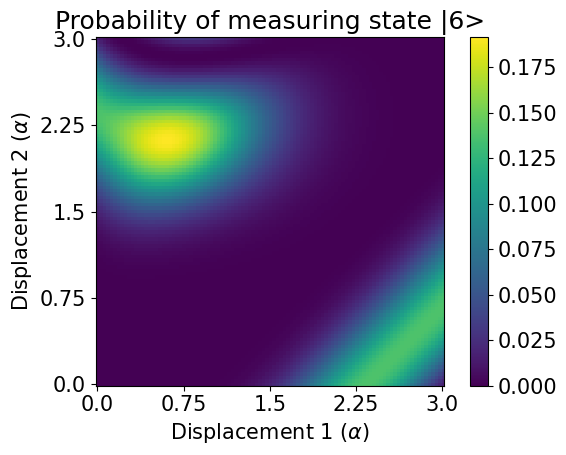

Maximum probability for |7> state: 0.348
Optimal parameters: 
 Displacement 1: 0.21 
 Displacement 2: 3.0


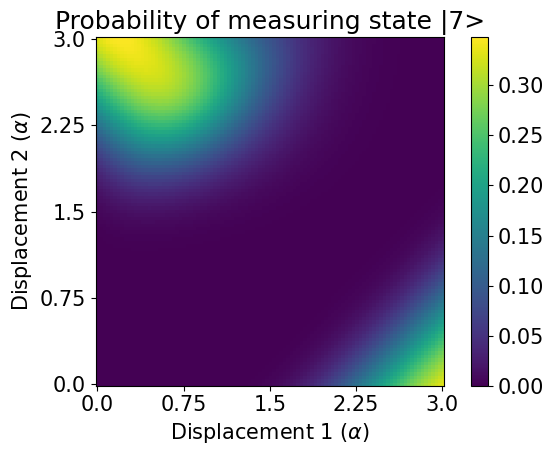

Maximum probability for |8> state: 0.0723
Optimal parameters: 
 Displacement 1: 0.6 
 Displacement 2: 2.28


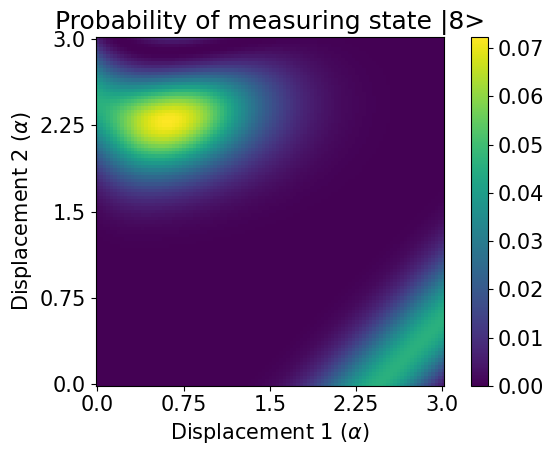

Maximum probability for |9> state: 0.611
Optimal parameters: 
 Displacement 1: 0.57 
 Displacement 2: 2.88


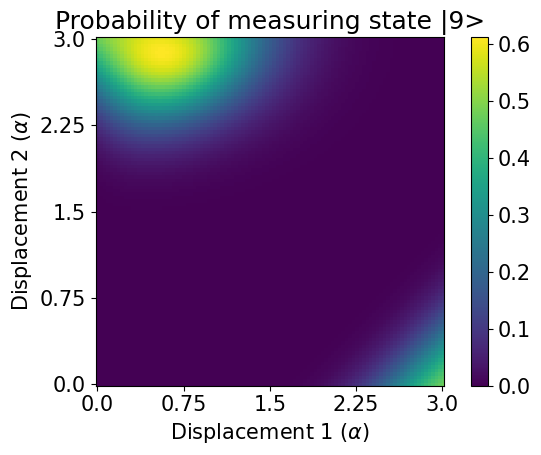

In [66]:
matplotlib.rcParams.update({'font.size': 15})
for i in range(dims):
    print(f'Maximum probability for |{i}> state: {round(max_probs[i], 4)}')
    print(f'Optimal parameters: \n Displacement 1: {op_params[i, 0]} \n Displacement 2: {op_params[i, 1]}')
            
    plt.imshow(state_arr[:, :, i].T)
    plt.xlabel("Displacement 1 ($\\alpha$)")
    plt.ylabel("Displacement 2 ($\\alpha$)")
    plt.title(f"Probability of measuring state |{i}>")
    plt.colorbar()
    plt.xticks(ticks=[0, 25, 50, 75, 100], labels=["0.0", "0.75", "1.5", "2.25", "3.0"])
    plt.yticks(ticks=[0, 25, 50, 75, 100][::-1], labels=["0.0", "0.75", "1.5", "2.25", "3.0"])
    plt.show()

In [42]:
dims = 10
num_iters = 101
mod_fock = [0, 1]
cavity = qt.basis(dims, 0)
proj_states = []
qubit = qt.basis(2, 0)
state = qt.tensor(qubit, cavity)
ideal_fock = [1, 2]
state_odds = np.array([0.7, 0.3])
# state_odds = state_odds / min(state_odds)


state_arr = np.empty((num_iters, num_iters))

full_state_arr = np.empty((num_iters, num_iters, dims))

# Alpha values to loop over
displace_amps = np.linspace(0, 3, num_iters)


# Prepare rotation matrix
phase_flip_mat = qt.tensor( 1j * qt.sigmax(), qt.basis(dims, mod_fock[0]).proj())
for fock in mod_fock:
    if fock is not mod_fock[0]:
        phase_flip_mat = phase_flip_mat + qt.tensor(1j * qt.sigmax(), qt.basis(dims, fock).proj())

phase_flip_mat = phase_flip_mat * phase_flip_mat

for i in range(dims):
    if i not in mod_fock:
        phase_flip_mat = phase_flip_mat + qt.tensor(qt.qeye(2), qt.basis(dims, i).proj())


op_param = [0, 0]
max_prob = 0

for i, disp_ampi_0 in enumerate(displace_amps): 
    # 1st displacement 
    displacement_mat_0 = qt.tensor(qt.qeye(2), qt.displace(dims, disp_ampi_0 + 0j))
    
    loop_state_0 = phase_flip_mat * displacement_mat_0 * state
    
    for j, disp_ampi_1 in enumerate(displace_amps):
       
        loop_state_1 = qt.tensor(qt.qeye(2), qt.displace(dims, -disp_ampi_1 + 0j)) * loop_state_0
        
        prob_val = []
        
        for fock in ideal_fock:
            prob_val.append(abs(loop_state_1.full()[fock, 0])**2)
            
        prob_val = np.min(np.array(prob_val) / np.array(state_odds))
        
        # prob_val = min(abs(loop_state_1.full()[1, 0])**2, abs(loop_state_1.full()[2, 0])**2)  # min(|1>, |2>)
        
        state_arr[i, num_iters - j - 1] = prob_val
        
        full_state_arr[i, num_iters - j - 1] = (abs(loop_state_1.full()[:, 0])**2)[:10]
        
        if prob_val > max_prob:
            max_prob = prob_val
            op_params = [disp_ampi_0, disp_ampi_1]

In [39]:
max_probs = np.zeros(dims)
print(op_params)
matplotlib.rcParams.update({'font.size': 15})
for i in range(dims):
    print(f'Maximum probability for |{i}> state: {round(max_probs[i], 4)}')
    print(f'Optimal parameters: \n Displacement 1: {np.array(op_params)[i, 0]} \n Displacement 2: {np.array(op_params)[i, 1]}')
            
    plt.imshow(np.array(state_arr)[:, :, i].T)
    plt.xlabel("Displacement 1 ($\\alpha$)")
    plt.ylabel("Displacement 2 ($\\alpha$)")
    plt.title(f"Probability of measuring state |{i}>")
    plt.colorbar()
    plt.xticks(ticks=[0, 25, 50, 75, 100], labels=["0.0", "0.75", "1.5", "2.25", "3.0"])
    plt.show()

[1.7999999999999998, 0.69]
Maximum probability for |0> state: 0.0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [43]:
fock_state_str = f'|{ideal_fock[0]}>'

for fock in ideal_fock:
    if fock != ideal_fock[0]:
        fock_state_str += " + |" + str(fock) + ">"

Maximum probability for |1> + |2> state: 0.8909
Optimal parameters: 
 Displacement 1: 1.98 
 Displacement 2: 1.02


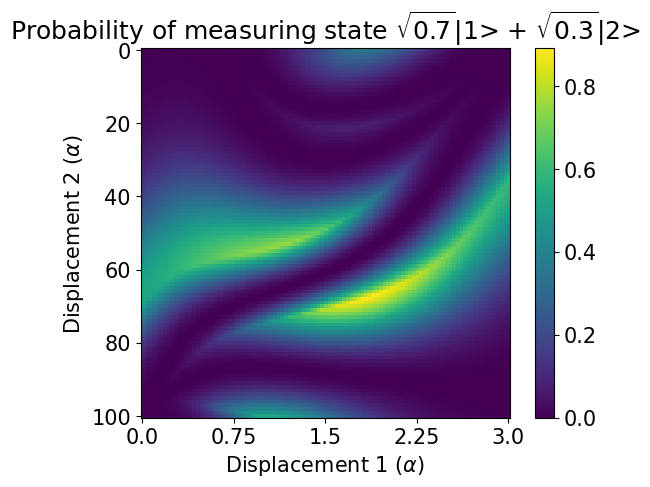

In [56]:
print(f'Maximum probability for {fock_state_str} state: {round(max_prob, 4)}')
print(f'Optimal parameters: \n Displacement 1: {op_params[0]} \n Displacement 2: {op_params[1]}')

plt.imshow(state_arr.T)
plt.xlabel("Displacement 1 ($\\alpha$)")
plt.ylabel("Displacement 2 ($\\alpha$)")
plt.title('Probability of measuring state $\\sqrt{0.7}$|1> + $\\sqrt{0.3}$|2>')
plt.xticks(ticks=[0, 25, 50, 75, 100], labels=["0.0", "0.75", "1.5", "2.25", "3.0"])
plt.colorbar()
plt.show()

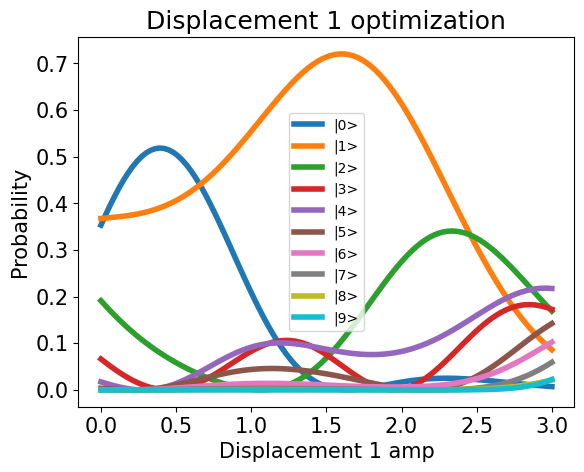

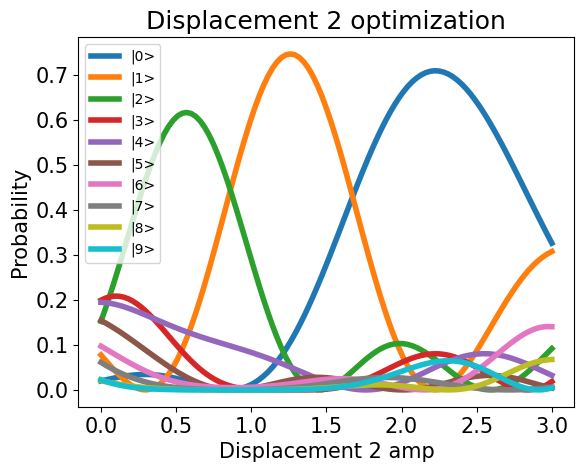

In [57]:
matplotlib.rcParams.update({'font.size': 15})
for i in range(dims):
    plt.plot(displace_amps, full_state_arr[:, num_iters - np.where(displace_amps == op_params[1])[0][0] - 1, i], label=f'|{i}>', linewidth=4)
plt.xlabel("Displacement 1 amp")
plt.ylabel("Probability")
plt.title("Displacement 1 optimization")
matplotlib.rcParams.update({'font.size': 10})
plt.legend()
plt.show()

matplotlib.rcParams.update({'font.size': 15})
for i in range(dims):
    plt.plot(displace_amps, full_state_arr[np.where(displace_amps == op_params[0])[0][0], :, i][::-1], label=f'|{i}>', linewidth=4)
plt.xlabel("Displacement 2 amp")
plt.ylabel("Probability")
plt.title("Displacement 2 optimization")
matplotlib.rcParams.update({'font.size': 10})
plt.legend()
plt.show()

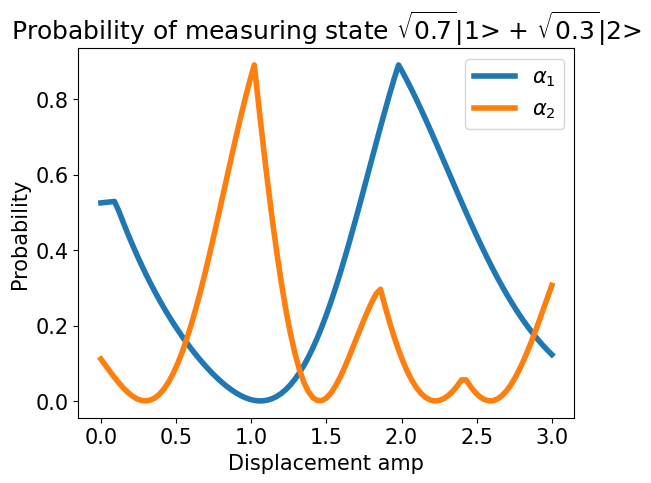

In [58]:
matplotlib.rcParams.update({'font.size': 15})
plt.plot(displace_amps, state_arr[:, num_iters - np.where(displace_amps == op_params[1])[0][0] - 1], label="$\\alpha_1$", linewidth=4)
plt.plot(displace_amps, state_arr[np.where(displace_amps == op_params[0])[0][0], :][::-1], label="$\\alpha_2$", linewidth=4)
plt.xlabel("Displacement amp")
plt.ylabel("Probability")
# plt.title(f'Displacement optimization for {fock_state_str}')
plt.title('Probability of measuring state $\\sqrt{0.7}$|1> + $\\sqrt{0.3}$|2>')
matplotlib.rcParams.update({'font.size': 15})
plt.legend()
plt.show()

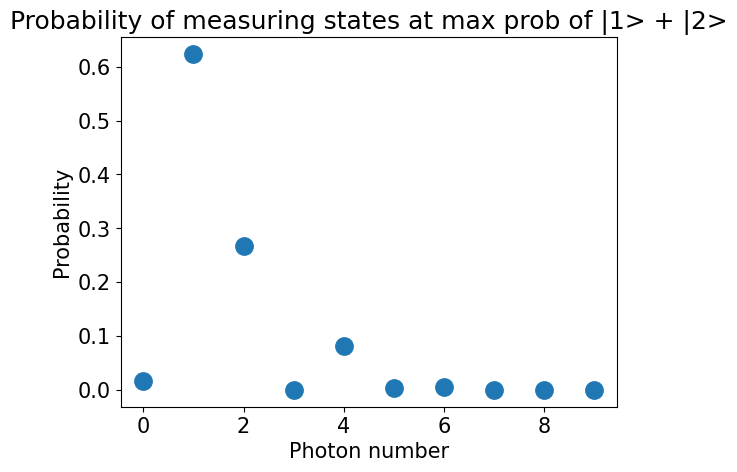

In [77]:
max_prob_states = full_state_arr[np.where(displace_amps == op_params[0])[0][0], num_iters - np.where(displace_amps == op_params[1])[0][0] - 1]
matplotlib.rcParams.update({'font.size': 15})
max_p_s = full_state_arr[np.where(displace_amps == op_params[0])[0][0], num_iters - np.where(displace_amps == op_params[1])[0][0] - 1]
plt.plot(np.arange(0, dims), full_state_arr[np.where(displace_amps == op_params[0])[0][0], num_iters - np.where(displace_amps == op_params[1])[0][0] - 1], linestyle="None", marker=".", markersize=25)
plt.xlabel("Photon number")
plt.ylabel("Probability")
plt.title(f'Probability of measuring states at max prob of {fock_state_str}')
plt.show()

fock: 1
prob: 0.6236377134429681
fock: 2
prob: 0.2676256932512082
0.2676256932512082
[0.62363771 0.26762569]
[0.7 0.6]
[0.62363771 0.26727331]


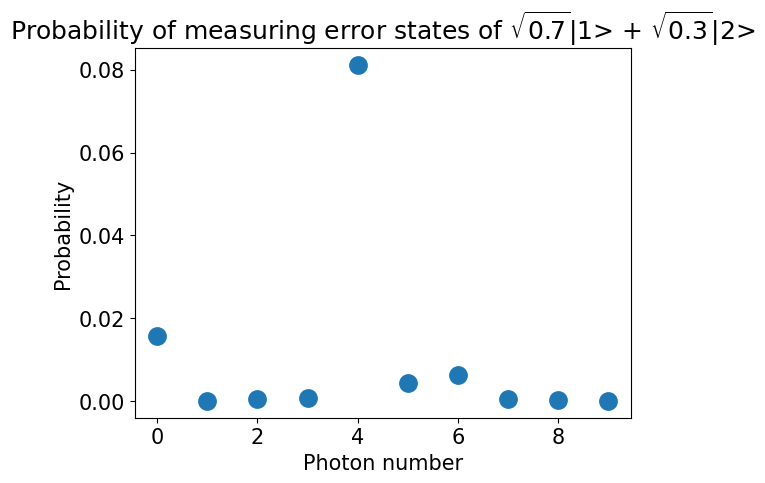

In [80]:
max_prob_err_states = np.copy(max_prob_states)

min_substate_prob = 1

for fock in ideal_fock:
    print(f'fock: {fock}')
    prob = max_prob_err_states[fock]
    print(f'prob: {prob}')
    if prob < min_substate_prob:
        min_substate_prob = prob
        
print(min_substate_prob)

for fock in ideal_fock:
    max_prob_err_states[fock] -= min_substate_prob

print(max_p_s[ideal_fock])
print(ideal_fock * state_odds)
# print(np.)
max_p_s_err = copy.deepcopy(max_p_s)
max_p_s_err[ideal_fock] -= (state_odds * max_prob)
print(state_odds * max_prob)

matplotlib.rcParams.update({'font.size': 15})
# print(max_prob_err_states)
plt.plot(np.arange(0, dims), max_p_s_err, linestyle="None", marker=".", markersize=25)
plt.xlabel("Photon number")
plt.ylabel("Probability")
# plt.title(f'Probability of measuring error states at max prob of {fock_state_str}')
plt.title('Probability of measuring error states of $\\sqrt{0.7}$|1> + $\\sqrt{0.3}$|2>')
plt.show()

In [52]:
disp_1_amps = np.array([0.015, 0.02985, 0.044700000000000004, 0.05955, 0.0744, 0.08925, 0.1041, 0.11895, 0.1338, 0.14865, 0.16349999999999998, 0.17835, 0.19319999999999998, 0.20805, 0.2229, 0.23775000000000002, 0.2526, 0.26745, 0.2823, 0.29715, 0.312, 0.32685000000000003, 0.3417, 0.35655000000000003, 0.3714, 0.38625000000000004, 0.4011, 0.41595000000000004, 0.4308, 0.44565000000000005, 0.4605, 0.47535000000000005, 0.4902, 0.50505, 0.5199, 0.5347500000000001, 0.5496, 0.56445, 0.5793, 0.5941500000000001, 0.609, 0.62385, 0.6387, 0.6535500000000001, 0.6684, 0.68325, 0.6981, 0.7129500000000001, 0.7278, 0.74265, 0.7575000000000001, 0.77235, 0.7872, 0.80205, 0.8169000000000001, 0.83175, 0.8466, 0.86145, 0.8763000000000001, 0.89115, 0.906, 0.9208500000000001, 0.9357000000000001, 0.95055, 0.9654, 0.9802500000000001, 0.9951, 1.00995, 1.0248, 1.03965, 1.0545, 1.06935, 1.0841999999999998, 1.0990499999999999, 1.1139, 1.12875, 1.1436, 1.15845, 1.1733, 1.18815, 1.2029999999999998, 1.2178499999999999, 1.2327, 1.24755, 1.2624, 1.27725, 1.2921, 1.3069499999999998, 1.3217999999999999, 1.33665, 1.3515, 1.36635, 1.3812, 1.39605, 1.4109, 1.4257499999999999, 1.4405999999999999, 1.45545, 1.4703, 1.48515, 1.5])

disp_1_contrasts = np.array([0.6117331803397801, 0.6575263651262127, 0.6879202708410892, 0.6701232145011224, 0.6910169593333038, 0.7303071050064291, 0.7647314281700264, 0.7804309729118657, 0.7958157442298952, 0.8266894210670479, 0.8654682148917723, 0.8627802656703345, 0.9177637669145384, 0.8994735543522356, 0.9319808258322722, 0.9616102195289118, 1.0063515470368787, 0.9852292668600815, 1.020683782369908, 1.056454423698555, 1.0468272916106542, 1.0759886283923041, 1.082466386054943, 1.0904891686203515, 1.1024707067078499, 1.167595121823099, 1.1091356183171228, 1.149777966924376, 1.1585802402291245, 1.1758269936171457, 1.1732201270478553, 1.166859581989691, 1.194227320569492, 1.1739384951442753, 1.1975151756297795, 1.2269740830617726, 1.2405782524409008, 1.1980174233595609, 1.2254893011592722, 1.2288421424592562, 1.2100772707684024, 1.229190491031968, 1.2152847926424095, 1.2381156176443195, 1.2173712882074414, 1.2114623131844076, 1.2093006077142368, 1.2050122260447553, 1.1910071604729118, 1.1816288055468995, 1.1769215086258695, 1.1893484356049346, 1.1761351352390785, 1.1635075935388117, 1.200615400707307, 1.1407379113873426, 1.1576789488281243, 1.1393275258325306, 1.1302012439803037, 1.1036635104504413, 1.1054650652475224, 1.0770800602555648, 1.096085292341805, 1.0559279457255033, 1.038857175111307, 1.017768693587324, 1.022993927229079, 1.0191601241901056, 1.0049370384105685, 0.9956598121454336, 0.960705775993429, 0.9527800750283073, 0.9696839089606084, 0.9314524930211445, 0.8913937421559286, 0.8795220609978438, 0.8897742621588347, 0.83259901511311, 0.8285818347646168, 0.8178635210427578, 0.8064950298764604, 0.7777188262539037, 0.7829410195597561, 0.7525489168949226, 0.7269572928033643, 0.7360352414782203, 0.7125984952522386, 0.6742823221171363, 0.7005567259501935, 0.6569213137549403, 0.6369830443285935, 0.6214176867039236, 0.5993982110350706, 0.5862138453301062, 0.6271681419887467, 0.5939492971616183, 0.524899824877203, 0.5383746652522823, 0.5208270378616362, 0.4472814211827991, 0.3556984228643181])

disp_1_contrasts /= 1.7289886480360876

In [53]:
print(np.where(disp_1_contrasts == 1.2405782524409008))
print(disp_1_contrasts[36])
print(disp_1_amps[36])

(array([], dtype=int64),)
0.7175167135134408
0.5496


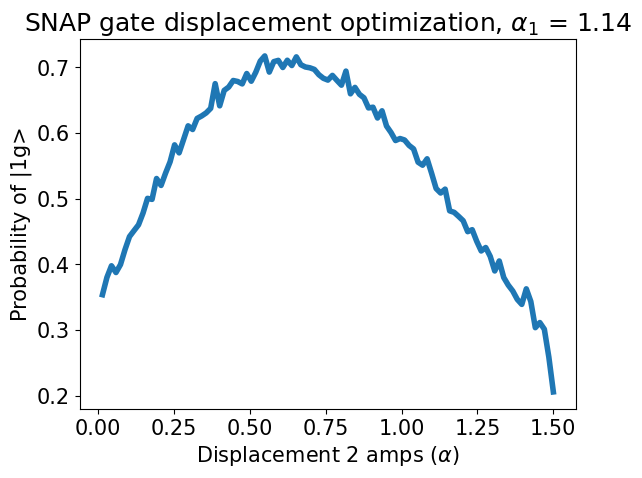

In [55]:
matplotlib.rcParams.update({'font.size': 15})
plt.plot(disp_1_amps, disp_1_contrasts, linewidth=4)
plt.xlabel("Displacement 2 amps ($\\alpha$)")
plt.ylabel("Probability of |1g>")
plt.title("SNAP gate displacement optimization, $\\alpha_1$ = 1.14")
plt.show()

In [23]:
max_index_1 = np.where(disp_1_contrasts == max(disp_1_contrasts))[0][0]
# max_index_3 = 39
max_prob_1 = disp_1_contrasts[max_index_1]
max_disp_1 = disp_1_amps[max_index_1]
print(f'max index: {max_index_1}')
print(f'max prob: {max_prob_1}')
print(f'max disp: {max_disp_1}')

max index: 36
max prob: 0.7175167135134408
max disp: 0.5496


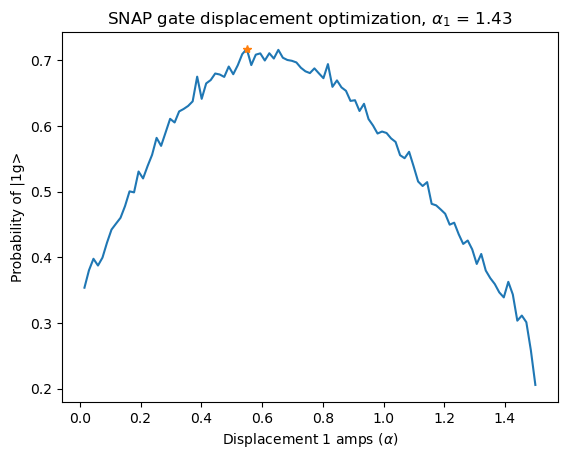

In [24]:
plt.plot(disp_1_amps, disp_1_contrasts)
plt.plot(max_disp_1, max_prob_1, marker='*')
plt.xlabel("Displacement 1 amps ($\\alpha$)")
plt.ylabel("Probability of |1g>")
plt.title("SNAP gate displacement optimization, $\\alpha_1$ = 1.43")
plt.show()

In [25]:
disp_2_amps = np.array([0.5, 0.515, 0.53, 0.545, 0.56, 0.575, 0.59, 0.605, 0.62, 0.635, 0.65, 0.665, 0.6799999999999999, 0.6950000000000001, 0.71, 0.725, 0.74, 0.755, 0.77, 0.7849999999999999, 0.8, 0.815, 0.83, 0.845, 0.86, 0.875, 0.89, 0.905, 0.9199999999999999, 0.935, 0.95, 0.965, 0.98, 0.995, 1.01, 1.025, 1.04, 1.055, 1.0699999999999998, 1.085, 1.1, 1.115, 1.13, 1.145, 1.16, 1.1749999999999998, 1.19, 1.205, 1.22, 1.2349999999999999, 1.25, 1.2650000000000001, 1.28, 1.295, 1.31, 1.325, 1.3399999999999999, 1.355, 1.37, 1.385, 1.4, 1.415, 1.43, 1.4449999999999998, 1.46, 1.475, 1.49, 1.505, 1.52, 1.535, 1.55, 1.565, 1.58, 1.595, 1.6099999999999999, 1.625, 1.64, 1.655, 1.67, 1.685, 1.7, 1.7149999999999999, 1.73, 1.7449999999999999, 1.76, 1.775, 1.79, 1.805, 1.8199999999999998, 1.835, 1.8499999999999999, 1.865, 1.88, 1.895, 1.91, 1.925, 1.94, 1.9549999999999998, 1.97, 1.9849999999999999, 2.0])

disp_2_contrasts = np.array([0.8154244759241434, 0.8155826609025412, 0.8750210119683026, 0.8843437780031875, 0.8805446456311934, 0.8930731996639989, 0.7542622374090215, 0.7521537597946479, 0.8021201423397368, 0.8026237100791942, 0.818581450870727, 0.825330541131319, 0.8092209799617267, 0.8458326322706511, 0.8387657755179911, 0.8499765279339551, 0.8843228207969624, 0.8688611894470242, 0.8912325543017583, 0.9107284605342705, 0.8770951270433787, 0.9171310150789918, 0.9703014532224528, 0.9421191760583383, 0.9189783853448947, 0.9413375492624778, 0.9572291500761938, 0.9461776837825542, 0.9622057429116677, 0.9827297650402358, 1.001859969469822, 1.0185015005704552, 0.9691117015687212, 1.0492058324485676, 1.0169823320825557, 1.026006679728126, 1.0530445930382377, 1.051084449812468, 1.011975788005067, 1.1294718643684485, 1.09509030059944, 1.1083572316247252, 1.1391621489753052, 1.0948232912604046, 1.1340535387081803, 1.1299669247049249, 1.1038178718949518, 1.1359326998665877, 1.1844137304784197, 1.1276089982298263, 1.1756378298093904, 1.142986586709483, 1.1521194980344798, 1.1834909380539789, 1.161202237132727, 1.139202895040497, 1.1732263946708963, 1.2234146176191556, 1.1994108168239492, 1.1735001632636037, 1.2116004936200877, 1.1825484540522684, 1.2190560698883, 1.1721619092852549, 1.1747475810916719, 1.1849026214485257, 1.1937025689743384, 1.2144988582459526, 1.1794760917862879, 1.1626033904185702, 1.1490392095092352, 1.1875691639360855, 1.1556491383375818, 1.1544596944661096, 1.1474578246541527, 1.16866513572351, 1.1550694800884176, 1.1464934763360448, 1.145153121044187, 1.1281187229434857, 1.1328674021818463, 1.1047069040959914, 0.9388391686275681, 0.932686436493583, 1.0909882468159178, 1.0875519273662844, 1.1021936721672796, 1.0873689858443776, 1.0804516979547731, 1.0816848323251793, 1.0949727976307104, 1.0696849699859425, 1.0440042367477784, 1.0613448101811929, 1.0507149039453092, 1.0598430902913132, 1.0466381165069278, 1.050508772564494, 1.0284232131667492, 1.0194703074938118, 1.023167323514858])

disp_2_contrasts /= 1.7289886480360876

In [26]:
max_index_2 = np.where(disp_2_contrasts == max(disp_2_contrasts))[0][0] 
max_index_2 = 62
max_prob_2 = disp_2_contrasts[max_index_2]
max_disp_2 = disp_2_amps[max_index_2]
print(f'max index: {max_index_2}')
print(f'max prob: {max_prob_2}')
print(f'max disp: {max_disp_2}')

max index: 62
max prob: 0.7050688685972539
max disp: 1.43


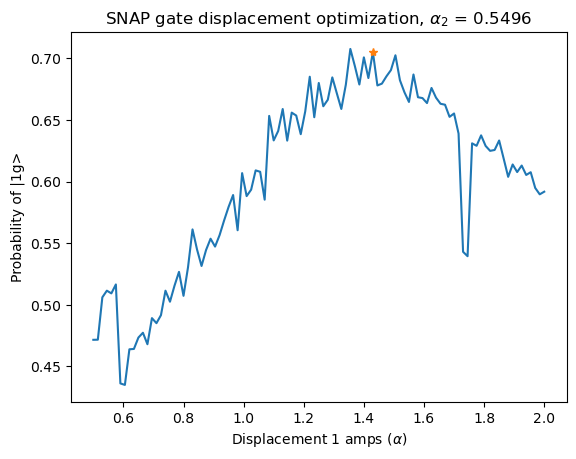

In [27]:
plt.plot(disp_2_amps, disp_2_contrasts)
plt.plot(max_disp_2, max_prob_2, marker='*')
plt.xlabel("Displacement 1 amps ($\\alpha$)")
plt.ylabel("Probability of |1g>")
plt.title("SNAP gate displacement optimization, $\\alpha_2$ = 0.5496")
plt.show()

In [28]:
disp_3_amps = np.array([0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.33999999999999997, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42000000000000004, 0.43, 0.44, 0.45, 0.45999999999999996, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.5900000000000001, 0.6000000000000001, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.6699999999999999, 0.6799999999999999, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75])

disp_3_contrasts = np.array(
    [0.7132882420335287, 0.7052539566850009, 0.7195896774812631, 0.73198107266106, 0.7571157643824384, 0.7733245457079319, 0.7458877358693803, 0.8017909407253052, 0.7936794629749881, 0.8180382395382431, 0.8135557120035646, 0.8415315037155984, 0.850327660796427, 0.8526525963953908, 0.8484305976505744, 0.8761642574456809, 0.8585221959886078, 0.8893706596517519, 0.8822304260713385, 0.8651034797085684, 0.9360351045264153, 0.8959453651133797, 0.9155417349839339, 0.9184690828542883, 0.9547685191494706, 0.9415141330166503, 0.9186670747821095, 0.9469545758099578, 0.9679840203460612, 0.9321754339960959, 0.9281656437376351, 0.9585802059620216, 0.9902133359298493, 0.9523417184912062, 0.9972738451980359, 0.9737149671561842, 0.9817053430903102, 0.98100141978796, 0.9826006570510706, 1.0003940156880162, 0.981176422584126, 0.9767730616745776, 1.0018082778515531, 0.9584773610822772, 0.9850065487791255, 0.9680964339967657, 0.966841294328677, 0.9854009649227358, 0.9701565027701178, 0.9780059336437446, 0.9645383070574551])

disp_3_contrasts /= 1.7289886480360876

In [29]:
max_index_3 = np.where(disp_3_contrasts == max(disp_3_contrasts))[0][0]
# max_index_3 = 39
max_prob_3 = disp_3_contrasts[max_index_3]
max_disp_3 = disp_3_amps[max_index_3]
print(f'max index: {max_index_3}')
print(f'max prob: {max_prob_3}')
print(f'max disp: {max_disp_3}')

max index: 42
max prob: 0.5794186555183463
max disp: 0.6699999999999999


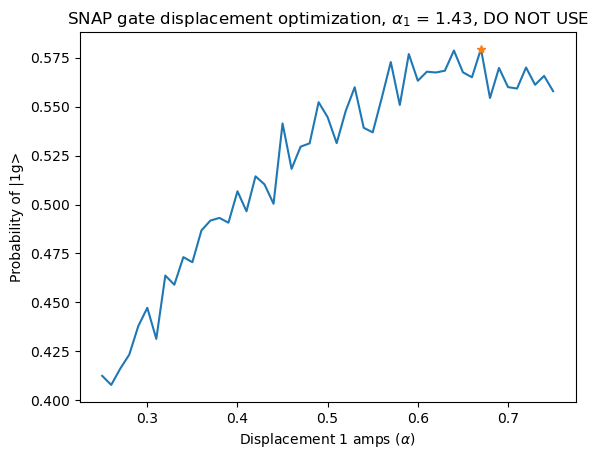

In [30]:
plt.plot(disp_3_amps, disp_3_contrasts)
plt.plot(max_disp_3, max_prob_3, marker='*')
plt.xlabel("Displacement 1 amps ($\\alpha$)")
plt.ylabel("Probability of |1g>")
plt.title("SNAP gate displacement optimization, $\\alpha_1$ = 1.43, DO NOT USE")
plt.show()

In [31]:
disp_3_amps = np.array([0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.33999999999999997, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42000000000000004, 0.43, 0.44, 0.45, 0.45999999999999996, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.5900000000000001, 0.6000000000000001, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.6699999999999999, 0.6799999999999999, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])

disp_3_contrasts = np.array(
    [0.9719316070626294, 0.9478834137624728, 0.9840420511320445, 1.0208245818374515, 1.0253298484907667, 0.9942753629861802, 1.0249924866327125, 1.0542554603914764, 1.0283697876232978, 1.0862955207149403, 1.0871168527507142, 1.1291476741709328, 1.0826185091703722, 1.0802038801362093, 1.0657431227988683, 1.1459644194097545, 1.1944638379519121, 1.2206384346956718, 1.240264072659403, 1.2420505606394823, 1.269433837012381, 1.2621806605790118, 1.2841448215126732, 1.298404124648624, 1.3205196011408438, 1.3172546700982581, 1.3429336460909127, 1.3573416991390008, 1.3335342508606474, 1.3560022543265426, 1.348746147811784, 1.3435808875051458, 1.3740622376508234, 1.3705876751561203, 1.3742409026359257, 1.3764417905688018, 1.3717593028811457, 1.3874205150160965, 1.3918207400780696, 1.4104366461165576, 1.4054434019875894, 1.4139964544788706, 1.4028228911615783, 1.400091459983757, 1.3819541262024992, 1.4144239689146016, 1.392010380818824, 1.4044520860949998, 1.3987870995115925, 1.4133518003729442, 1.4016158126379308, 1.3873724168283443, 1.4157518131274942, 1.405780631476653, 1.3797630906469731, 1.407170687789662, 1.3955838439621029, 1.3871615179503982, 1.3679167239742147, 1.3930740421831789, 1.3679873619669727, 1.3883439446801935, 1.370345994608466, 1.366791948155302, 1.3769847605030823, 1.3678793339723918, 1.354739015545582, 1.3467471117839562, 1.3596331256637755, 1.3404614675105018, 1.3310303564748658, 1.3117944010024083, 1.3228143821577985, 1.278125553181406, 1.1050907531773233, 0.9772566963498326])

disp_3_contrasts /= 1.933031331356136

In [32]:
max_index_3 = np.where(disp_3_contrasts == max(disp_3_contrasts))[0][0]
max_index_3 = 45
max_prob_3 = disp_3_contrasts[max_index_3]
max_disp_3 = disp_3_amps[max_index_3]
print(f'max index: {max_index_3}')
print(f'max prob: {max_prob_3}')
print(f'max disp: {max_disp_3}')

max index: 45
max prob: 0.7317129039612097
max disp: 0.7


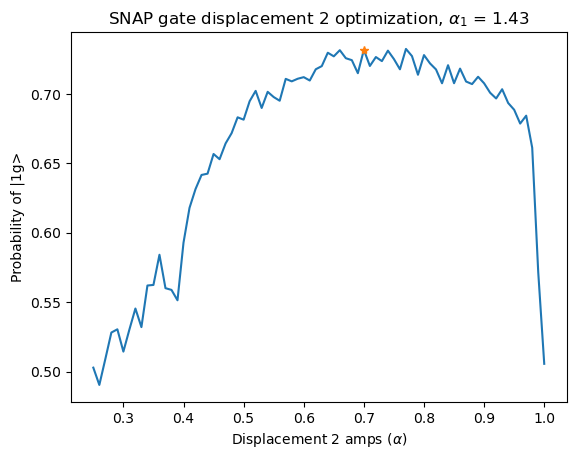

In [33]:
plt.plot(disp_3_amps, disp_3_contrasts)
plt.plot(max_disp_3, max_prob_3, marker='*')
plt.xlabel("Displacement 2 amps ($\\alpha$)")
plt.ylabel("Probability of |1g>")
plt.title("SNAP gate displacement 2 optimization, $\\alpha_1$ = 1.43")
plt.show()

In [34]:
disp_4_amps = np.array([1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.3900000000000001, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.6099999999999999, 1.62, 1.63, 1.6400000000000001, 1.65, 1.6600000000000001, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75])

disp_4_contrasts = np.array(
    [1.2746545179927251, 1.2852526766324992, 1.3776172644090325, 1.2304358487741751, 1.1869654040628512, 1.1576355511665086, 1.1805871155585155, 1.2485381416721144, 1.2391202218325208, 1.1714015462542784, 1.2541115280254411, 1.2327019277873883, 1.2406257524936375, 1.2679461744284857, 1.2734194695580983, 1.2881064469813894, 1.2923798987173651, 1.2489282273696776, 1.2733825967930585, 1.2829688299883413, 1.2515219549704941, 1.2881304377041327, 1.2827438789937196, 1.2690635842838567, 1.2688977479907706, 1.2497984521696681, 1.2600878952775636, 1.266160733253271, 1.2546310019272395, 1.2652739312697543, 1.239010816767018, 1.2360911067277167, 1.3031162793171007, 1.2511608980101583, 1.2165176464884484, 1.2018595930408, 1.2082932813055165, 1.226492921570137, 1.1858992734622025, 1.1904576213620242, 1.2144769821995633, 1.1969335903988414, 1.2176303227190917, 1.1907051455101632, 1.1729197620590353, 1.206940384049315, 1.233814110140111, 1.1993814469677324, 1.1953986065026265, 1.1644829888138204, 1.1785765024400714])

disp_4_contrasts /= 1.805219167882119

In [35]:
max_index_4 = np.where(disp_4_contrasts == max(disp_4_contrasts))[0][0]
max_index_4 = 21
max_prob_4 = disp_4_contrasts[max_index_4]
max_disp_4 = disp_4_amps[max_index_4]
print(f'max index: {max_index_4}')
print(f'max prob: {max_prob_4}')
print(f'max disp: {max_disp_4}')

max index: 21
max prob: 0.7135590296303832
max disp: 1.46


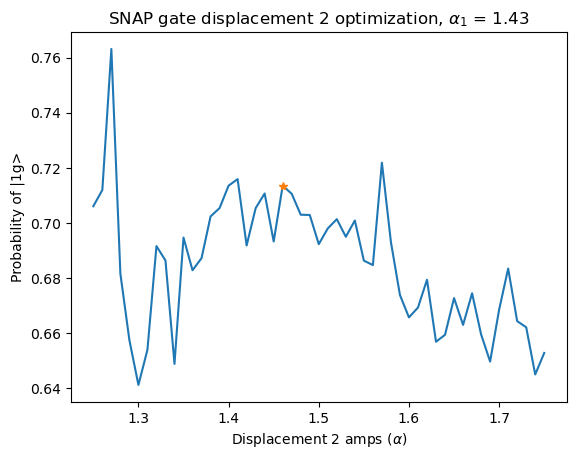

In [36]:
plt.plot(disp_4_amps, disp_4_contrasts)
plt.plot(max_disp_4, max_prob_4, marker='*')
plt.xlabel("Displacement 2 amps ($\\alpha$)")
plt.ylabel("Probability of |1g>")
plt.title("SNAP gate displacement 2 optimization, $\\alpha_1$ = 1.43")
plt.show()